### Project Title
RiskScope: Global Disaster Prediction

## Problem Statement 
The project uses a dataset and a simple prediction model to figure out which places in the world are most at risk from natural disasters like floods or storms. It looks at factors like how exposed a place is, how poor or unprepared people are, and how risks have changed over time to predict a disaster risk score (WRI)

### Description 
The dataset includes the World Risk Index (WRI) and factors like Exposure (disaster likelihood), Susceptibility (poverty, weak infrastructure), Lack of Coping/Adaptive Capabilities, and Year for regions worldwide, aiming to identify disaster-prone areas. Using a simple regression model, we predict WRI to pinpoint high-risk regions and key risk drivers. The model and clear charts help governments and communities plan better defenses, like stronger shelters or emergency training, to reduce disaster impacts. Categorical columns (WRI Category, etc.) validate predictions for actionable insights.

In [84]:
## Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from yellowbrick.regressor import PredictionError  # Optional visualizer
import shap  # Optional explainer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-disaster-risk-index-time-series-dataset/world_risk_index.csv


In [85]:
#import the dataset 
df = pd.read_csv("/kaggle/input/global-disaster-risk-index-time-series-dataset/world_risk_index.csv")
df.head(10)

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High
5,Bangladesch,17.45,27.52,63.41,44.96,86.49,58.77,2011,Very High,Very High,Very High,High
6,Timor-Leste,17.45,25.97,67.17,52.42,89.16,59.93,2011,Very High,Very High,Very High,Very High
7,Costa Rica,16.74,42.39,39.50,21.96,63.39,33.14,2011,Very High,Very High,Low,Low
8,Kambodscha,16.58,26.66,62.18,48.28,86.43,51.81,2011,Very High,Very High,High,High
9,El Salvador,16.49,32.18,51.24,30.55,75.35,47.82,2011,Very High,Very High,Medium,Medium


In [86]:
#exploring and Understanding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [87]:
#statistical description of the dataset
df.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1916.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090511,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.551156,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.192500,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.080000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.065000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [88]:
#check for all the null values
df.isnull().sum()

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

### EDA 



In [89]:
df.shape

(1917, 12)

In [90]:
df.columns

Index(['Region', 'WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', ' Lack of Adaptive Capacities', 'Year',
       'Exposure Category', 'WRI Category', 'Vulnerability Category',
       'Susceptibility Category'],
      dtype='object')

In [91]:
## redundant

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [92]:
## selecting only the numerical columns
numerical_cols =  list(df.select_dtypes(include=['int64','float64']).columns)
numerical_cols

['WRI',
 'Exposure',
 'Vulnerability',
 'Susceptibility',
 'Lack of Coping Capabilities',
 ' Lack of Adaptive Capacities',
 'Year']

In [93]:
categorical_cols =  list(df.select_dtypes(exclude=['int64','float64']).columns)
categorical_cols

['Region',
 'Exposure Category',
 'WRI Category',
 'Vulnerability Category',
 'Susceptibility Category']

In [94]:
df = df.replace([np.inf,-np.inf],np.nan)

#### Univariate Analysis

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


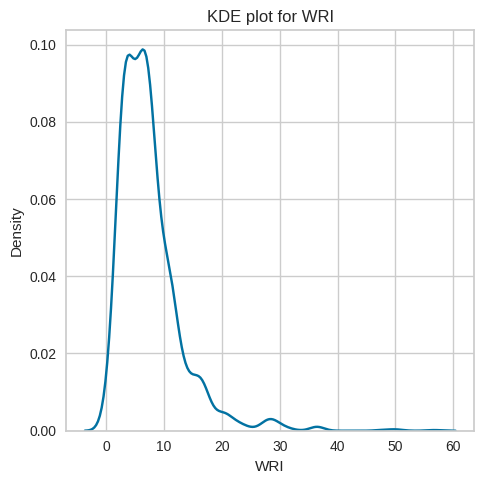

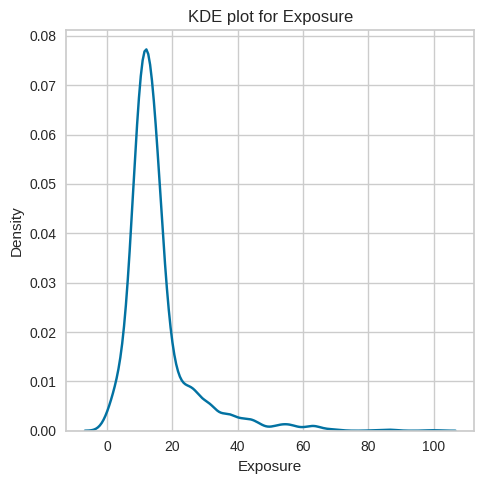

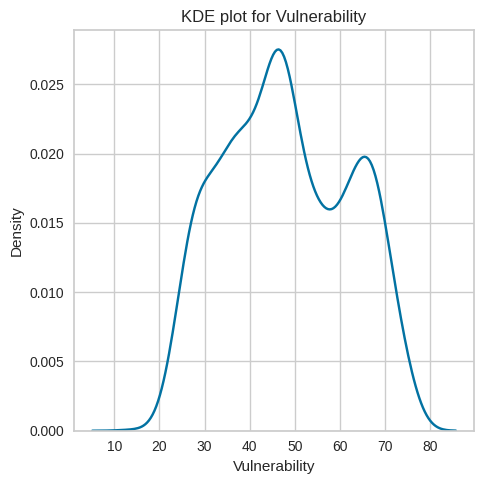

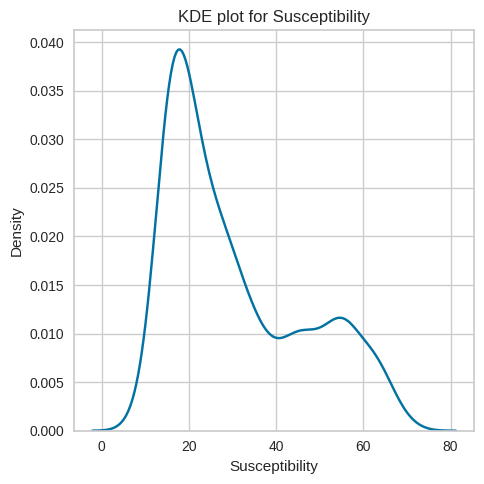

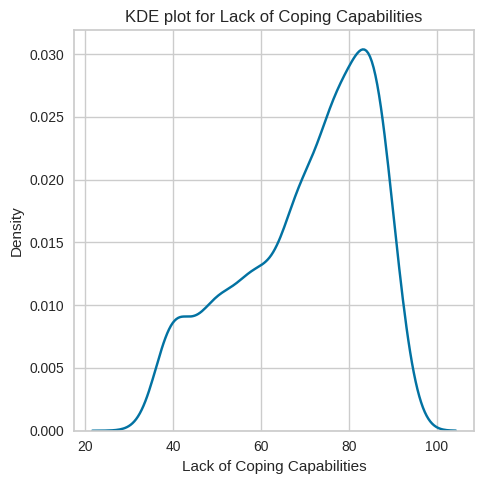

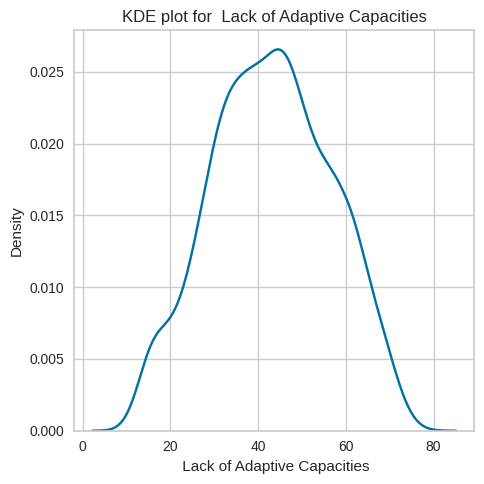

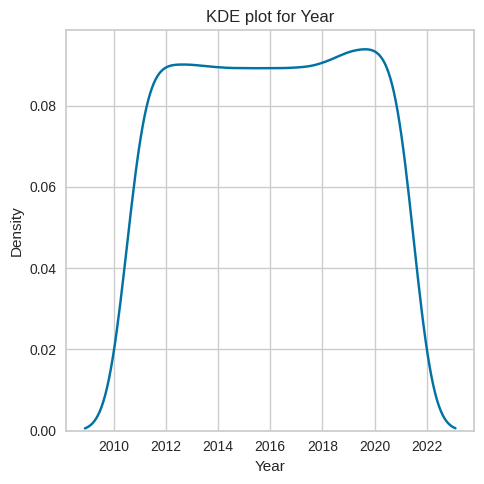

In [95]:
## KDE plot for all the numerical columns 

for col in numerical_cols:
    plt.figure(figsize=(5,5))
    sns.kdeplot(data=df[col])
    plt.title(f"KDE plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    


In [96]:
## Analysing categorical variables

df['Region'].nunique()

306

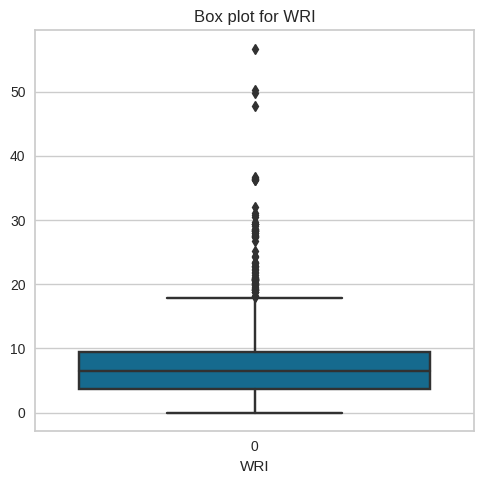

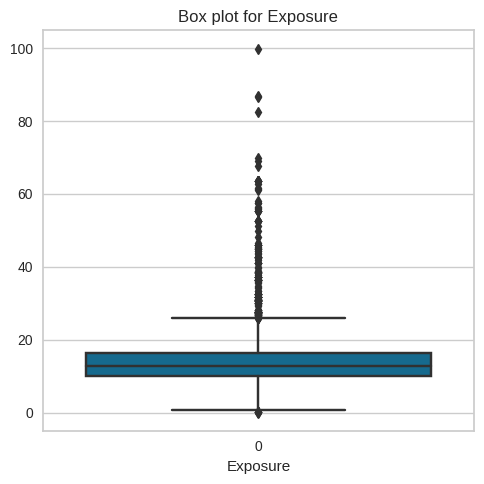

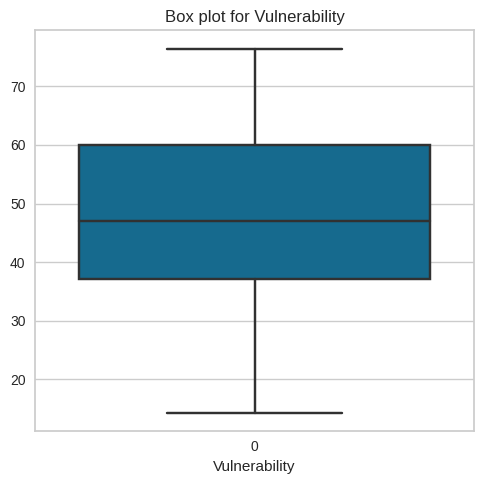

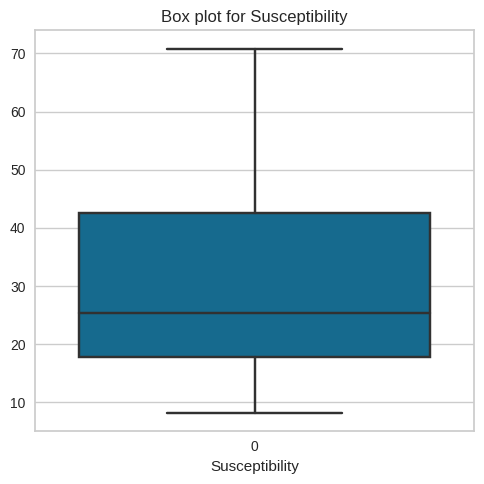

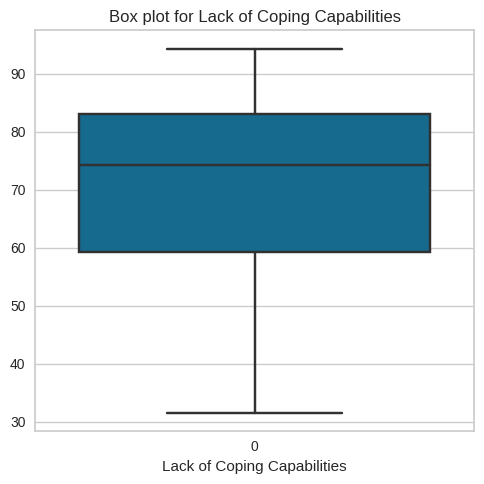

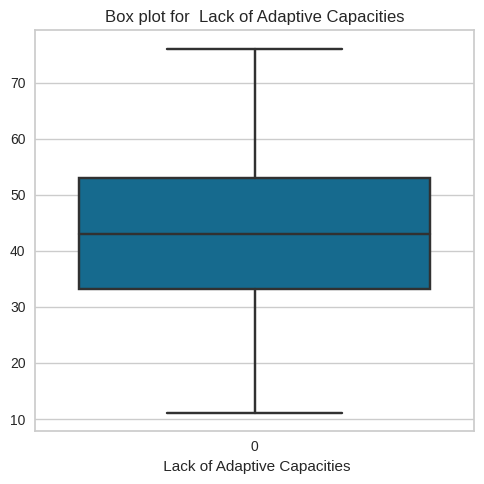

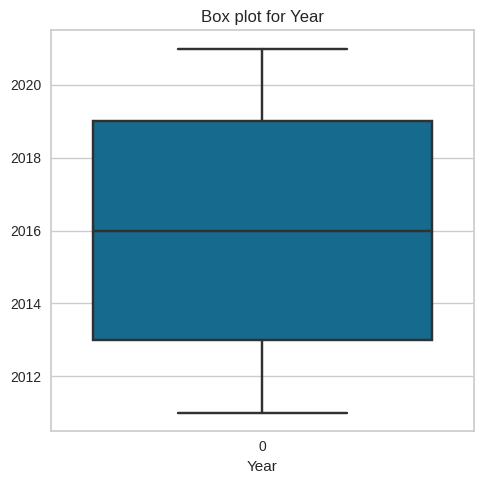

In [97]:
## Outlier analysis
for col in numerical_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df[col])
    plt.title(f"Box plot for {col}")
    plt.xlabel(col)
    plt.tight_layout()




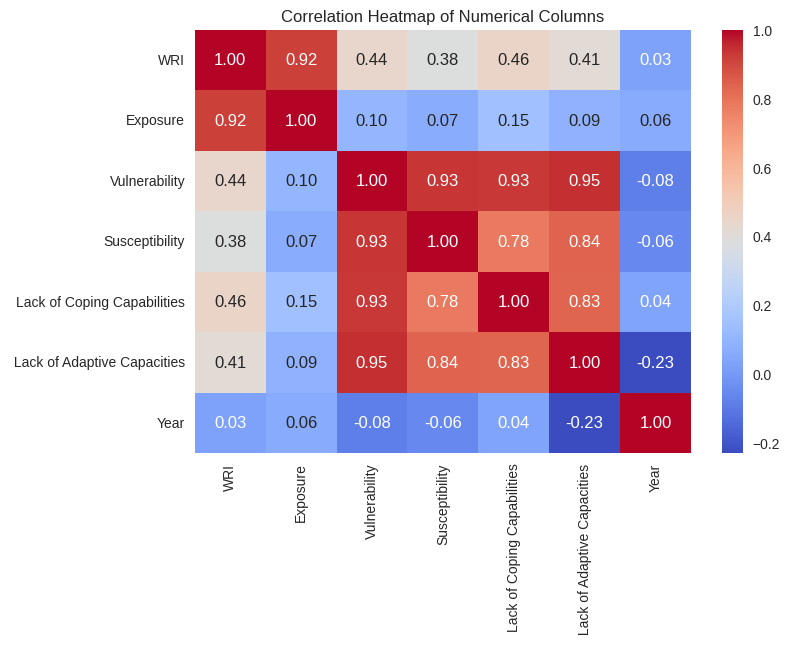

In [98]:
## Bivariate analysis 


## 1. Correlation Matrix

corr_matrix = df[numerical_cols].corr()

sns.heatmap(data = corr_matrix, annot = True,fmt = '.2f',cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

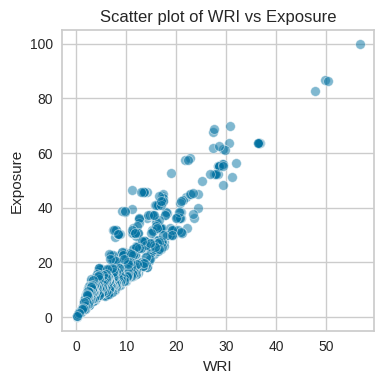

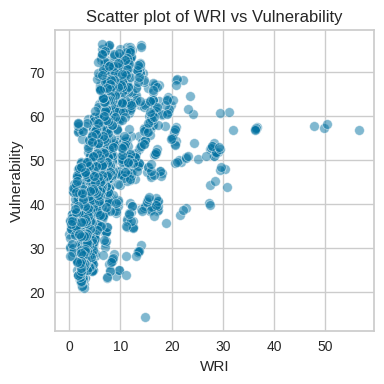

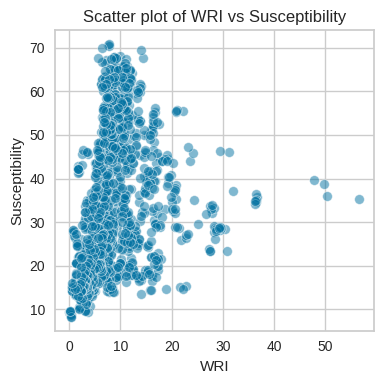

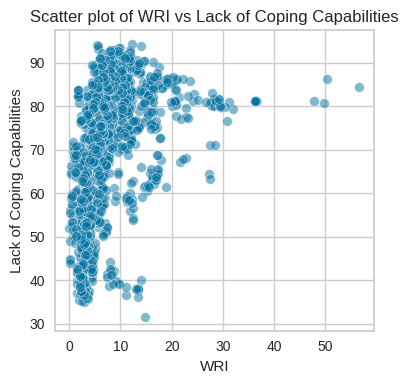

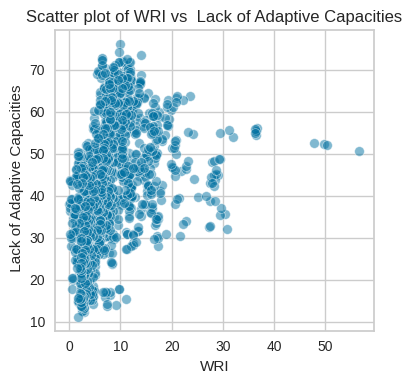

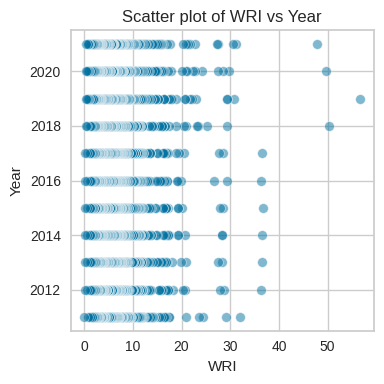

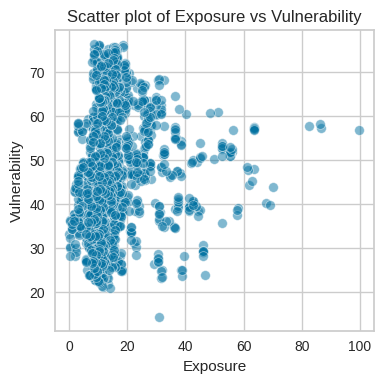

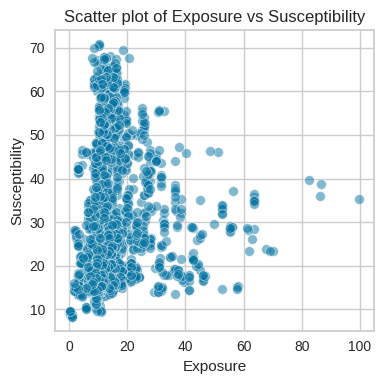

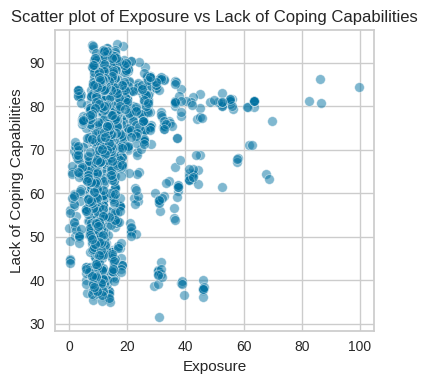

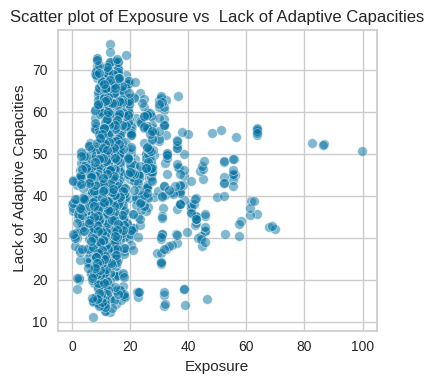

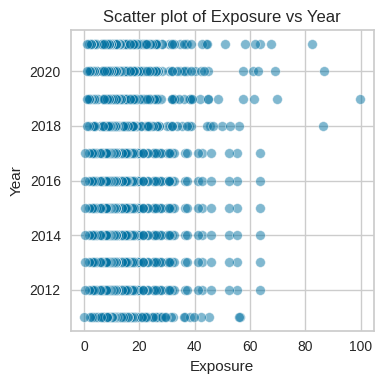

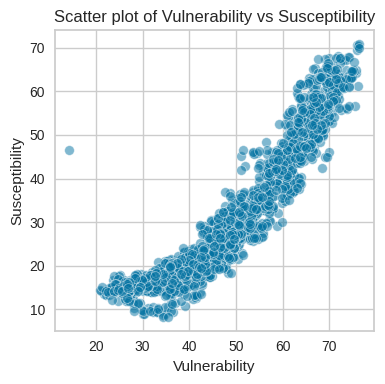

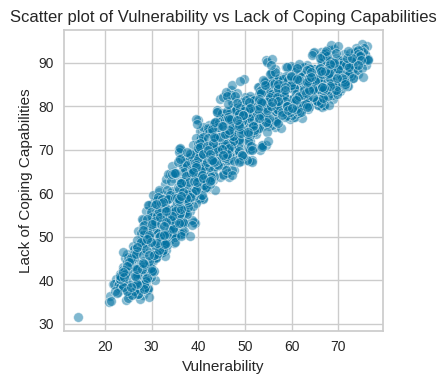

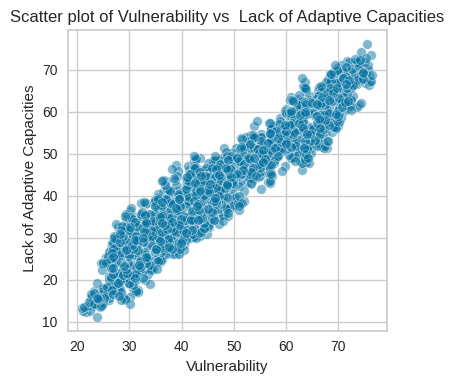

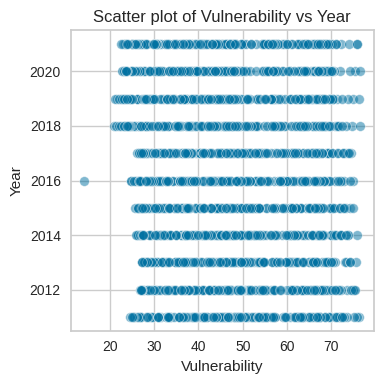

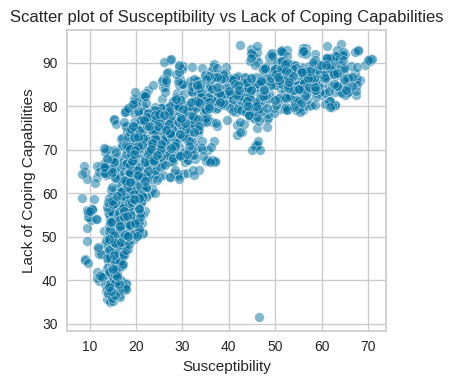

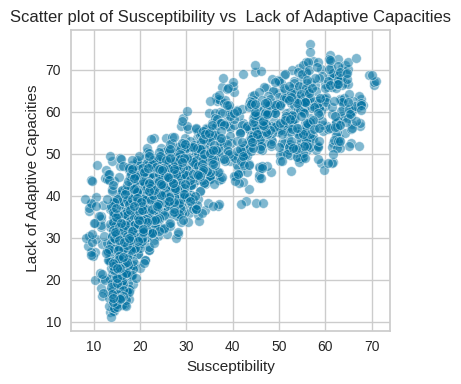

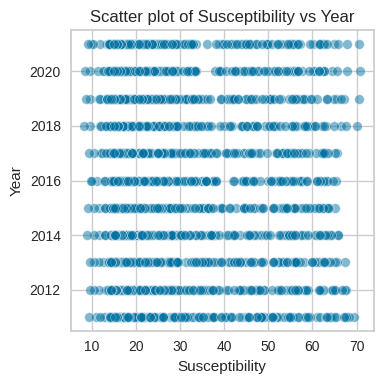

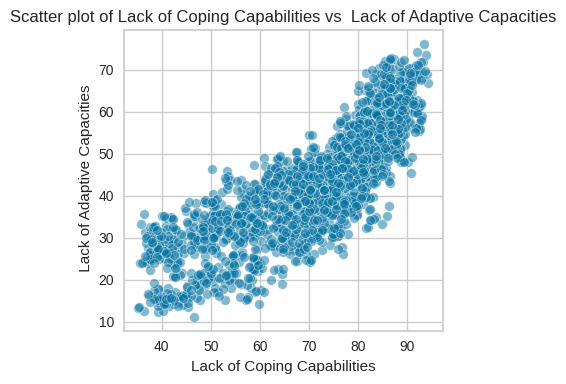

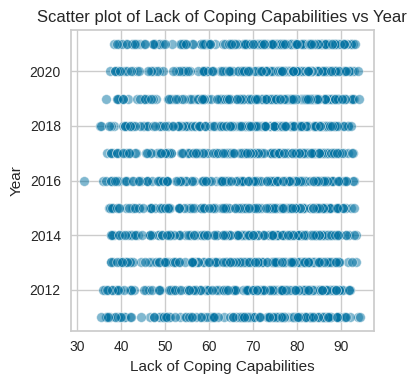

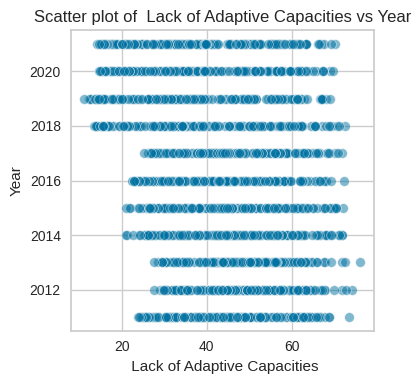

In [99]:
## 2.Pairplot
import itertools

pairs = list(itertools.combinations(numerical_cols,2))

for x,y in pairs:
    plt.figure(figsize= (4,4))
    sns.scatterplot(x=df[x],y=df[y],alpha=0.5)
    plt.title(f"Scatter plot of {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

In [100]:
## Feature transformation 

df[numerical_cols].describe()


,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1916.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090511,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.551156,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.192500,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.080000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.065000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [110]:
## Feature and target selection

numerical_cols = numerical_cols[:len(numerical_cols)]
numerical_cols

['WRI',
 'Exposure',
 'Vulnerability',
 'Susceptibility',
 'Lack of Coping Capabilities',
 ' Lack of Adaptive Capacities']

In [114]:
#Feature Selection 

X = df[numerical_cols].drop('WRI',axis=1)
y = df['WRI']


,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities
0,56.33,56.81,37.14,79.34,53.96
1,56.04,51.90,28.94,81.80,44.97
2,45.09,53.93,34.99,82.78,44.01
3,36.40,64.60,44.11,85.95,63.74
4,38.42,54.35,35.36,77.83,49.87
...,...,...,...,...,...
1912,3.13,45.39,24.54,68.82,42.82
1913,3.46,38.26,18.20,50.29,46.29
1914,2.93,38.96,14.80,65.01,37.07
1915,1.65,36.25,15.97,59.33,33.44


In [118]:
#Feature shape comparison

X.shape
y.shape


#splitting into test and training data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [121]:
X_train.shape

(1533, 5)